In [19]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [12]:
# Задача 1
data = pd.read_csv('ratings.csv')
def assessment(param):
    if param <= 2:
        return 'Низкий'
    elif param <= 4:
        return 'Средний'
    elif 4.5 <= param <= 5:
        return 'Высокий'
    else:
        return ''
        
data['class'] =data['rating'].apply(assessment)


,userId,movieId,rating,timestamp,class
0,1,31,2.5,1260759144,Средний
1,1,1029,3.0,1260759179,Средний
2,1,1061,3.0,1260759182,Средний
3,1,1129,2.0,1260759185,Низкий
4,1,1172,4.0,1260759205,Средний
...,...,...,...,...,...
99999,671,6268,2.5,1065579370,Средний
100000,671,6269,4.0,1065149201,Средний
100001,671,6365,4.0,1070940363,Средний
100002,671,6385,2.5,1070979663,Средний


In [155]:
# Задача 2
geo_data = { 'Центр': ['москва', 'тула', 'ярославль'],
             'Северо-Запад': ['петербург', 'псков', 'мурманск'],
             'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
           }

data = pd.read_csv('keywords.csv')
geo_d = {}


for key in geo_data.keys():
    for i in range(len(geo_data[key])):
        geo_d[geo_data[key][i]] = key
    geo_d[key] = key

    
def geo_check(param):
    
    for elem in geo_d.keys():
        if elem in param:
            return geo_d[elem]
        else:
            return 'undefined'

data['region'] = data['keyword'].apply(geo_check)
# data_d = data[ (data['region']!='undefined') ]
# data_d

,keyword,shows,region
127,авито москва,979292,Центр
1259,москва,153050,Центр
1396,гисметео москва,140279,Центр
1482,госуслуги москва,133061,Центр
1682,погода москва,151701,Центр
...,...,...,...
98388,пилюли ру интернет аптека москва,3690,Центр
98679,геи москва,4205,Центр
98943,вакансии на авито москва от прямых работодателей,3738,Центр
99292,афиша кино москва на сегодня,3704,Центр


In [175]:
#  Задача 2. 
# Пока не понял ка использовать два аргумента в функции pandas, поэому решил задачу через использование двух функций.

geo_data = { 'Центр': ['москва', 'тула', 'ярославль'],
             'Северо-Запад': ['петербург', 'псков', 'мурманск'],
             'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
           }

data = pd.read_csv('keywords.csv')

def add_reg_df(df, geo_data):
    
    geo_d = {}
    
    for key in geo_data.keys():
        for i in range(len(geo_data[key])):
            geo_d[geo_data[key][i]] = key
        geo_d[key] = key

    def geo_check(param):

        for elem in geo_d.keys():
            if elem in param:
                return geo_d[elem]
            else:
                return 'undefined'
            
    df['region'] = df['keyword'].apply(geo_check)

add_reg_df(data, geo_data)


# data_d = data[ (data['region']!='undefined') ]
# data_d

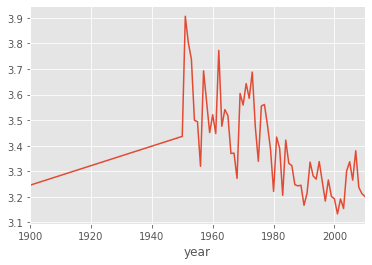

In [38]:
# Задача 3
import numpy as np

years = np.arange(1950,2011)

m = pd.read_csv('movies.csv')
r = pd.read_csv('ratings.csv')

full_rm = r.merge(m, on='movieId', how='left')[['title','rating']]

full_rm = full_rm.groupby('title').mean()['rating'].to_frame().reset_index()
full_rm.head()

def year_check(param):
    
    for elem in years:
        if str(elem) in param:
            return elem
        else:
            continue


full_rm['year'] = full_rm['title'].apply(year_check).fillna(1900)
full_rm = full_rm.groupby('year').mean()['rating'].to_frame().reset_index()
full_rm.sort_values(by=['rating'], ascending=False)

# пока не нашел как можно расширить график и уменьшить шаг
# на оси х с 20 на 10 с промежуточным 5, но в целом вроде бы мы видим, что утверждение верное. Раньше фильмы были лучше :)

full_rm.set_index('year')['rating'].plot()